In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

In [2]:
data = pd.read_csv('insurance.csv')
df = data.copy()

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.shape

(1338, 7)

In [5]:
df = pd.get_dummies(df,columns=['sex','smoker','region'],drop_first=True) 

In [6]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [7]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False


In [8]:
df['smoker_yes'] = df['smoker_yes'].astype(int)
df['region_northwest'] = df['region_northwest'].astype(int)
df['region_southeast'] = df['region_southeast'].astype(int)
df['region_southwest'] = df['region_southwest'].astype(int)

In [9]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,1,0,0,1
1,18,33.770,1,1725.55230,True,0,0,1,0
2,28,33.000,3,4449.46200,True,0,0,1,0
3,33,22.705,0,21984.47061,True,0,1,0,0
4,32,28.880,0,3866.85520,True,0,1,0,0


In [10]:
Y = df['charges']
X = df.drop('charges',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=111)
model = LinearRegression()
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.7909586859393721

In [11]:
df2 = pd.DataFrame()

In [12]:
df2['Y'] = Y

In [13]:
df2['Y_pred'] = model.predict(X)  
Y_pred = df2['Y_pred']

In [14]:
df2['Texmin_ferqi'] = df2['Y'] - df2['Y_pred']

In [15]:
df2['Squared_error'] = df2['Texmin_ferqi']**2                     ###    MSE 

In [16]:
df2['absolute_error'] = np.abs(df2['Texmin_ferqi'])               ###    MAE

In [17]:
df2['percent_error'] = np.abs((df2['Y']-df2['Y_pred'])/df2['Y'])  ###    MAPE

In [18]:
df2

,Y,Y_pred,Texmin_ferqi,Squared_error,absolute_error,percent_error
0,16884.92400,25151.652335,-8266.728335,6.833880e+07,8266.728335,0.489592
1,1725.55230,3481.540600,-1755.988300,3.083495e+06,1755.988300,1.017638
2,4449.46200,6875.451166,-2425.989166,5.885423e+06,2425.989166,0.545232
3,21984.47061,4273.459187,17711.011423,3.136799e+08,17711.011423,0.805615
4,3866.85520,5994.225469,-2127.370269,4.525704e+06,2127.370269,0.550155
...,...,...,...,...,...,...
1333,10600.54830,12877.095140,-2276.546840,5.182666e+06,2276.546840,0.214757
1334,2205.98080,3385.460033,-1179.479233,1.391171e+06,1179.479233,0.534673
1335,1629.83350,4007.269659,-2377.436159,5.652203e+06,2377.436159,1.458699
1336,2007.94500,1269.744754,738.200246,5.449396e+05,738.200246,0.367640


In [19]:
df2.mean()

Y                 1.327042e+04
Y_pred            1.329908e+04
Texmin_ferqi     -2.865422e+01
Squared_error     3.658395e+07
absolute_error    4.166608e+03
percent_error     4.142143e-01
dtype: float64

In [20]:
mean_absolute_percentage_error(Y,Y_pred)

0.41421429862418996

In [21]:
Y_pred

0       25151.652335
1        3481.540600
2        6875.451166
3        4273.459187
4        5994.225469
            ...     
1333    12877.095140
1334     3385.460033
1335     4007.269659
1336     1269.744754
1337    37174.637257
Name: Y_pred, Length: 1338, dtype: float64

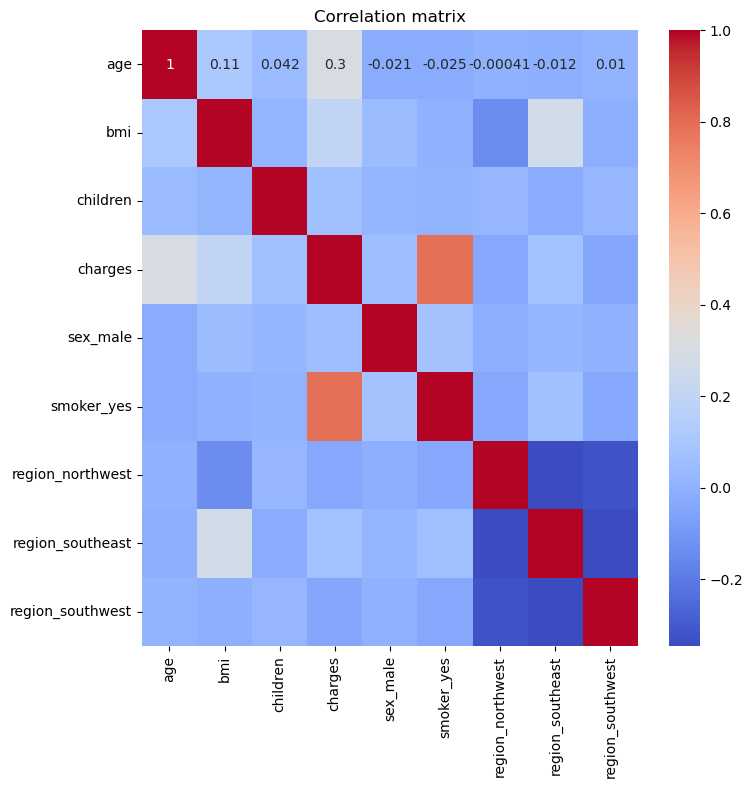

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm' )
plt.title('Correlation matrix')
plt.show()

In [36]:
y_test
Y_pred
a = df2['Y'] -df2['Y_pred']       #MAE

In [37]:
a

0       -8266.728335
1       -1755.988300
2       -2425.989166
3       17711.011423
4       -2127.370269
            ...     
1333    -2276.546840
1334    -1179.479233
1335    -2377.436159
1336      738.200246
1337    -8033.276957
Length: 1338, dtype: float64

In [38]:
y_test=[0,1,0,0,0,1,1,1,0,1,1,1]
y_pred=[1,0,0,0,0,0,1,1,0,1,1,0]
from sklearn.metrics import f1_score,precision_score,recall_score,fbeta_score

In [45]:
pre = precision_score(y_test,y_pred)
rec = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)
fbeta = fbeta_score(y_test,y_pred,beta=0.5)
fbeta2 = fbeta_score(y_test,y_pred,beta=2)

In [46]:
print(pre,rec,f1,fbeta,fbeta2)

0.8 0.5714285714285714 0.6666666666666666 0.7407407407407408 0.6060606060606061
